In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'M:/Risk Management/DW/TUX Scorecard/InternalSegmentationTestPayloads_2024H1Data.xlsx')

In [3]:
df2 = pd.read_excel(r'M:/Risk Management/DW/TUX Scorecard/InternalSegmentationTestPayloads_2024H2Data.xlsx')

In [4]:
df3 = pd.read_excel(r'M:/Risk Management/DW/TUX Scorecard/InternalSegmentationTestPayloads_2025Data.xlsx')

In [5]:
min_date = df3['APPDATE'].min()

max_date = df3['APPDATE'].max()

print(f"Min AppDate: {min_date}")
print(f"Max AppDate: {max_date}")

Min AppDate: 2024-07-28 00:00:00
Max AppDate: 2025-06-19 00:00:00


In [6]:
df_comb1 = pd.concat([df, df2], ignore_index=True)

In [7]:
df_comb = pd.concat([df_comb1, df3], ignore_index=True)

In [8]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902864 entries, 0 to 902863
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PAYLOADDATE         902864 non-null  datetime64[ns]
 1   APPDATE             902864 non-null  datetime64[ns]
 2   PAYLOADACCOUNTNUM   902864 non-null  int64         
 3   BITDEBTOR__APP      902864 non-null  int64         
 4   BITSYSTEMDECLINE    902864 non-null  int64         
 5   APPROVALDATE__APP   0 non-null       float64       
 6   BITAPPROVED         902864 non-null  int64         
 7   BITFUNDED           902864 non-null  int64         
 8   BKCOUNT24MONTH__LN  882121 non-null  float64       
 9   BKTIMENEWEST__LN    882121 non-null  float64       
 10  INTOPENBKTYPE__APP  45066 non-null   float64       
 11  OPENBKTYPE_NEW      902864 non-null  int64         
 12  RE01S__TU           887251 non-null  float64       
 13  G251B__TU           887251 no

In [9]:
scorecard_cols = ['OPENBK', 'OPENBKTYPENEW', 'THINFILE', 'THICKDIRTY', 'THICKCLEAN']

In [10]:
# scorecard_cols = ['OPENBK', 'OPENBKTYPENEW', 'OPENBKTYPECOMB', 'THINFILE', 'THICKDIRTY', 'THICKCLEAN']

In [11]:
profile_counts = df_comb[scorecard_cols].sum().sort_values(ascending=False)

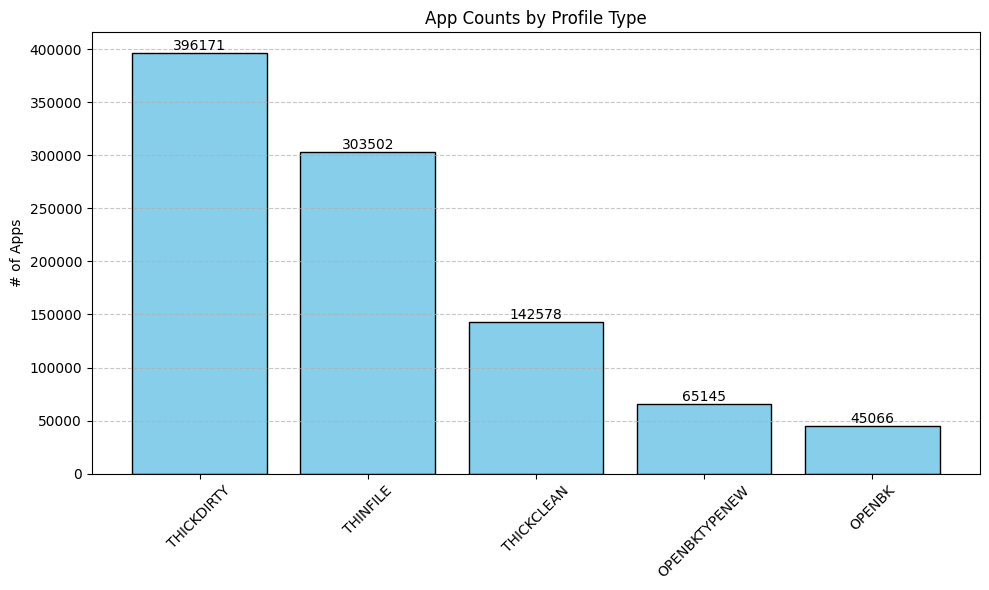

In [12]:
# Plot

plt.figure(figsize=(10,6))
bars = plt.bar(profile_counts.index, profile_counts.values, color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.title('App Counts by Profile Type')
plt.ylabel('# of Apps')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# plt.figure(figsize=(10,6))
# profile_counts.plot(kind='bar', color='skyblue', edgecolor='black')
# plt.title('App Counts by Profile Type')
# plt.ylabel('# of Apps')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [13]:
min_date = df_comb['APPDATE'].min()

max_date = df_comb['APPDATE'].max()

print(f"Min AppDate: {min_date}")
print(f"Max AppDate: {max_date}")

Min AppDate: 2021-10-02 00:00:00
Max AppDate: 2025-06-19 00:00:00


In [14]:
# Make sure APPDATE is datetime
df_comb['APPDATE'] = pd.to_datetime(df_comb['APPDATE'])



In [15]:
# Group by month
df_comb['YearMonth'] = df_comb['APPDATE'].dt.to_period('M')
monthly_counts = df_comb.groupby('YearMonth')[scorecard_cols].sum()

# Convert index to timestamp so matplotlib plots it correctly
monthly_counts.index = monthly_counts.index.to_timestamp()


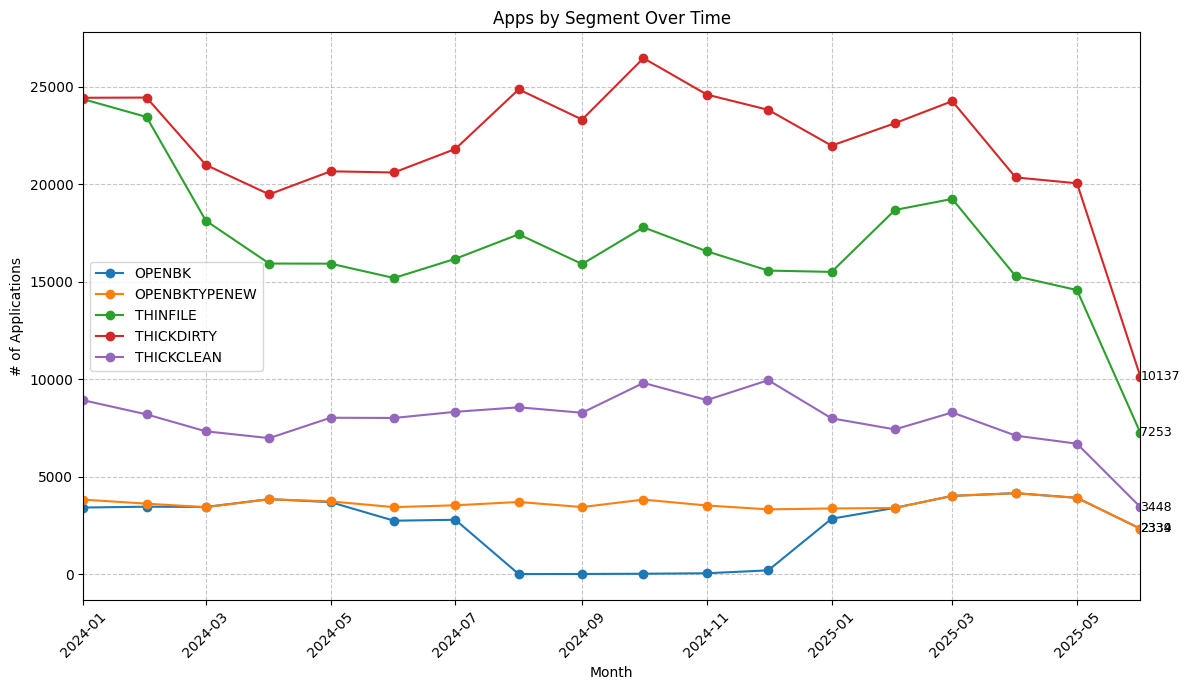

In [16]:
# Plot
plt.figure(figsize=(12, 7))

for col in scorecard_cols:
    plt.plot(monthly_counts.index, monthly_counts[col], label=col, marker='o')
    # Label the last value
    plt.text(monthly_counts.index[-1], monthly_counts[col].iloc[-1], 
             str(int(monthly_counts[col].iloc[-1])), 
             ha='left', va='center', fontsize=9)

plt.title('Apps by Segment Over Time')
plt.xlabel('Month')
plt.ylabel('# of Applications')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xlim(pd.Timestamp('2024-01-01'), monthly_counts.index.max())

plt.tight_layout()
plt.show()

In [17]:
scorecard_cols2 = ['OPENBKTYPENEW', 'THINFILE', 'THICKDIRTY', 'THICKCLEAN']

In [18]:
monthly_counts2 = df_comb.groupby('YearMonth')[scorecard_cols2].sum()

# Convert index to timestamp so matplotlib plots it correctly
monthly_counts2.index = monthly_counts2.index.to_timestamp()

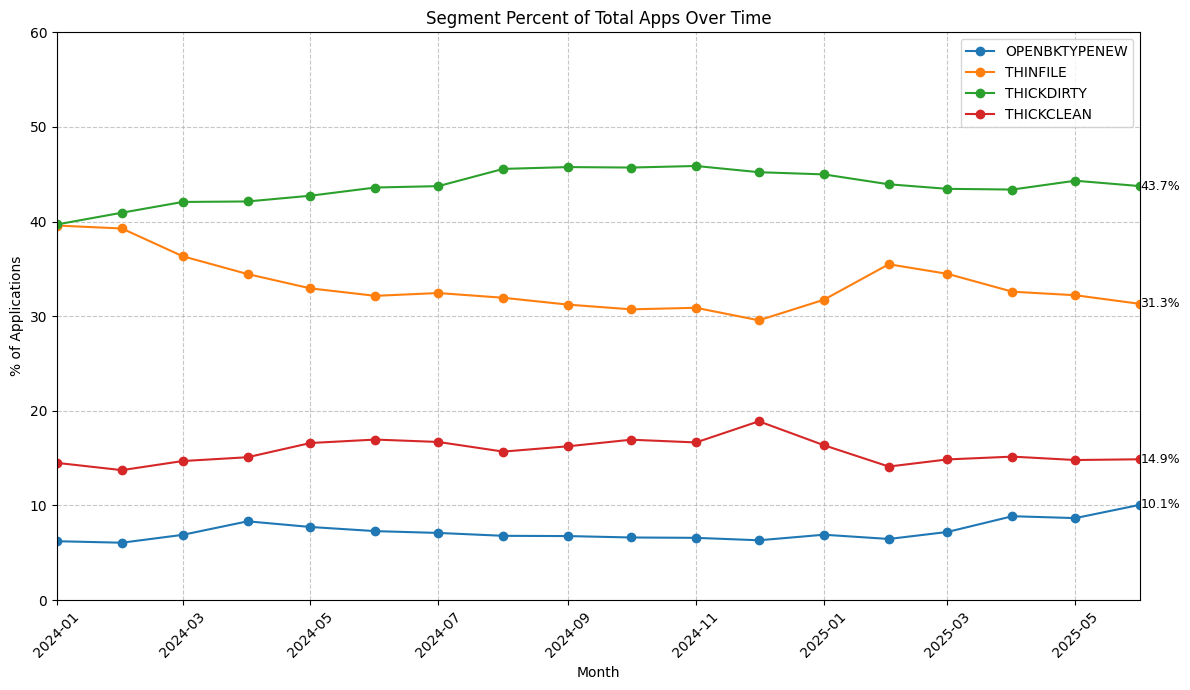

In [19]:
# Calc % 
monthly_percent = monthly_counts2.div(monthly_counts2.sum(axis=1), axis=0) * 100

# Plot

plt.figure(figsize=(12, 7))

for col in scorecard_cols2:
    plt.plot(monthly_percent.index, monthly_percent[col], label=col, marker='o')
    last_value = monthly_percent[col].iloc[-1]
    plt.text(monthly_percent.index[-1], last_value, f'{last_value:.1f}%', 
             ha='left', va='center', fontsize=9)

plt.title('Segment Percent of Total Apps Over Time')
plt.xlabel('Month')
plt.ylabel('% of Applications')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(0,60)
plt.xlim(pd.Timestamp('2024-01-01'), monthly_percent.index.max())
plt.tight_layout()
plt.show()



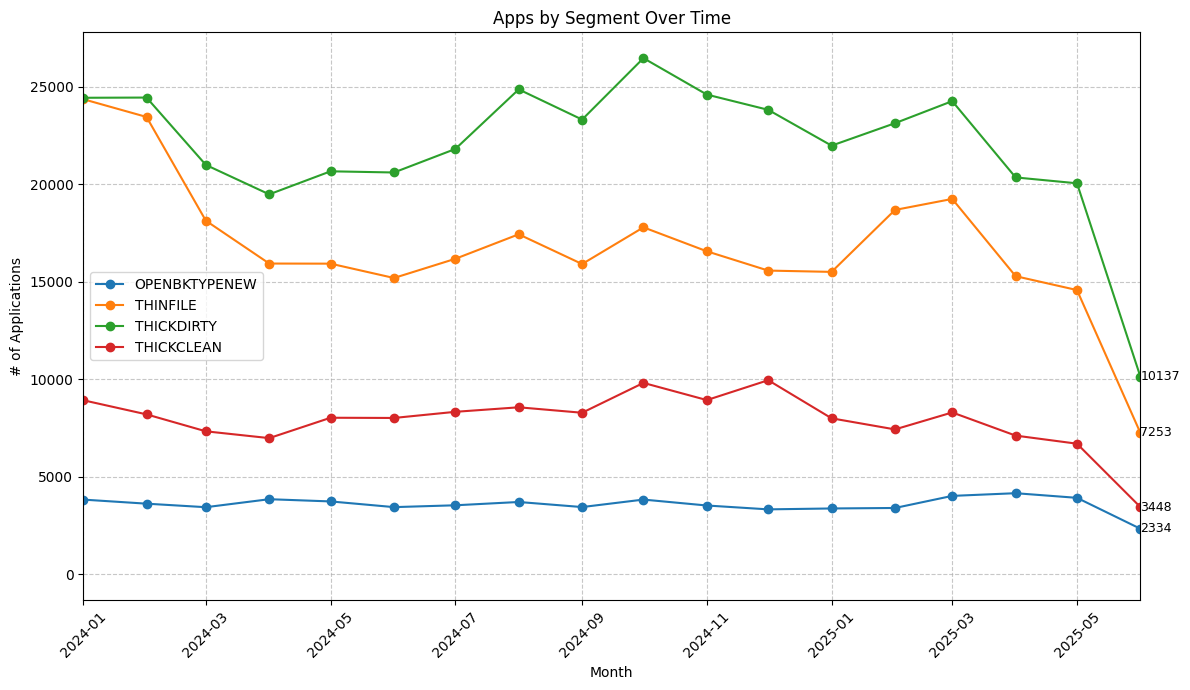

In [20]:

# Plot
plt.figure(figsize=(12, 7))

for col in scorecard_cols2:
    plt.plot(monthly_counts2.index, monthly_counts2[col], label=col, marker='o')
    # Label the last value
    plt.text(monthly_counts2.index[-1], monthly_counts2[col].iloc[-1], 
             str(int(monthly_counts2[col].iloc[-1])), 
             ha='left', va='center', fontsize=9)

plt.title('Apps by Segment Over Time')
plt.xlabel('Month')
plt.ylabel('# of Applications')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.xlim(pd.Timestamp('2024-01-01'), monthly_counts2.index.max())


plt.tight_layout()
plt.show()


In [21]:
df_new = pd.read_csv(r'M:/Risk Management/DW/TUX Scorecard/TUX_Scores/Tux_OpenBK_SourceTest_2024.csv')

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746375 entries, 0 to 746374
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ACCOUNTID                       746375 non-null  object 
 1   APPLICATION_ACCOUNT_KEY         746375 non-null  object 
 2   PAYLOADACCOUNTID                746375 non-null  int64  
 3   BIGDEBTORID                     746374 non-null  float64
 4   REQUEST_DATETIME                746375 non-null  object 
 5   APPLICATION_SOURCE              746188 non-null  object 
 6   PROOF_OF_INCOME_PROMOTION_FLAG  746375 non-null  object 
 7   SYSTEM_APPROVAL_FLAG            746375 non-null  object 
 8   SYSTEM_DECLINED_FLAG            746375 non-null  object 
 9   TIER                            329472 non-null  object 
 10  APPDATE                         746375 non-null  object 
 11  APPROVEDDATE                    226723 non-null  object 
 12  FUNDEDDATE      

In [23]:
min_date1 = df_new['APPDATE'].min()

max_date1 = df_new['APPDATE'].max()

print(f"Min AppDate: {min_date1}")
print(f"Max AppDate: {max_date1}")

Min AppDate: 1/1/2024
Max AppDate: 9/9/2024


In [24]:
sc_cols = ['TUXSC1_OPENBK', 'TUXSC2_THIN', 'TUXSC3_THICKDIRTY', 'TUXSC4_THICKCLEAN']

In [25]:
profile_counts_new = df_new[sc_cols].sum().sort_values(ascending=False)

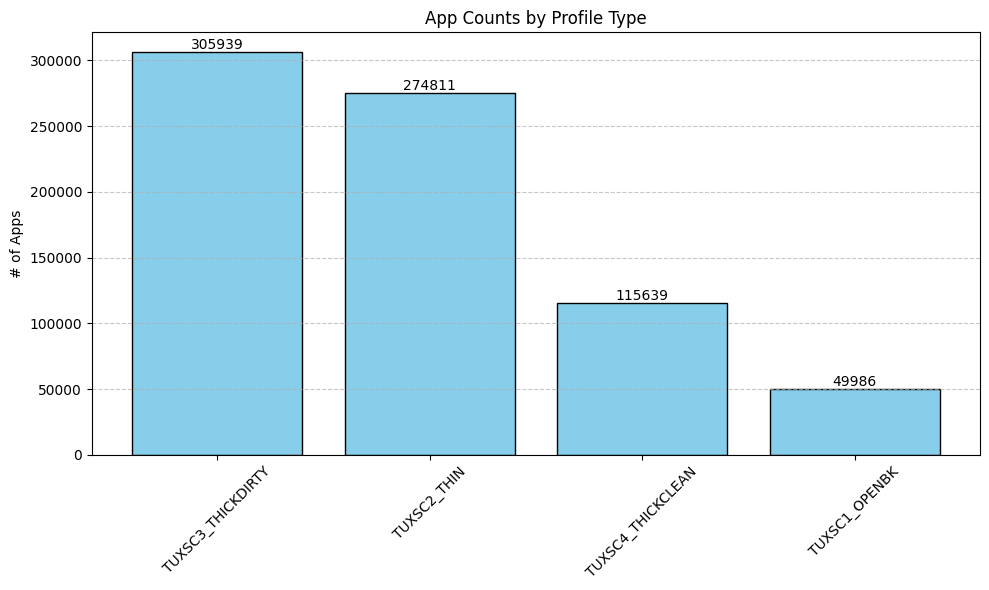

In [26]:
# Plot

plt.figure(figsize=(10,6))
bars = plt.bar(profile_counts_new.index, profile_counts_new.values, color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.title('App Counts by Profile Type')
plt.ylabel('# of Apps')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
# Make sure APPDATE is datetime
df_new['APPDATE'] = pd.to_datetime(df_new['APPDATE'])

In [28]:
# Group by month
df_new['YearMonth'] = df_new['APPDATE'].dt.to_period('M')
monthly_counts_new = df_new.groupby('YearMonth')[sc_cols].sum()

# Convert index to timestamp so matplotlib plots it correctly
monthly_counts_new.index = monthly_counts_new.index.to_timestamp()

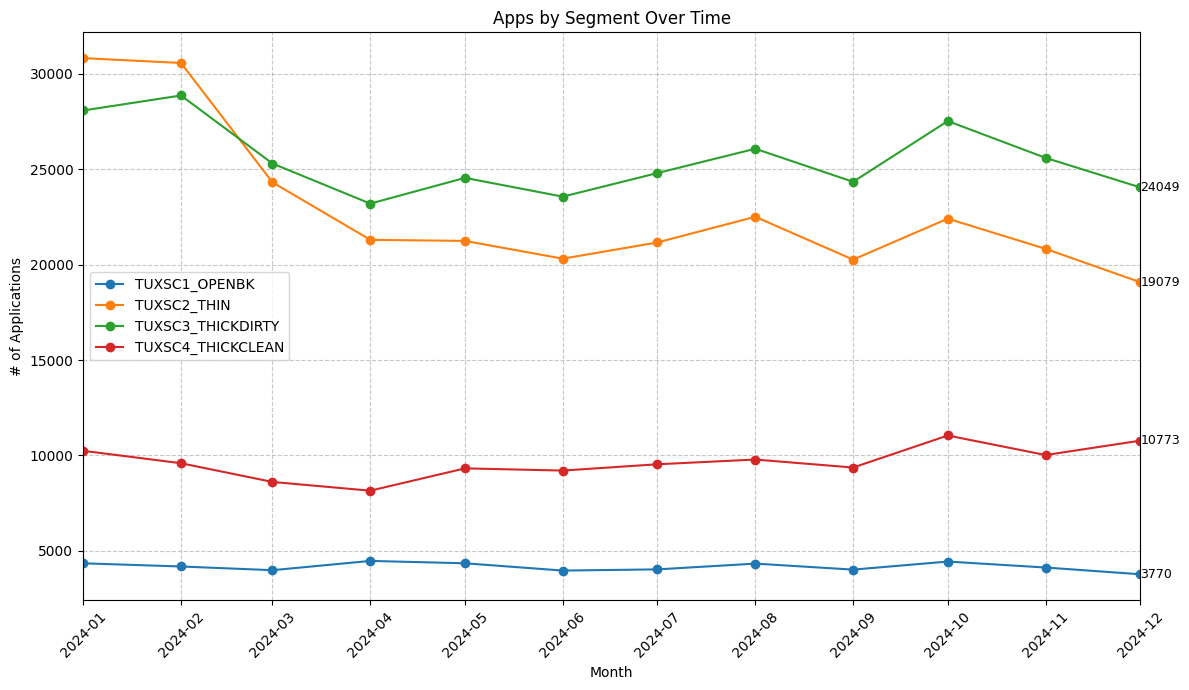

In [29]:
# Plot
plt.figure(figsize=(12, 7))

for col in sc_cols:
    plt.plot(monthly_counts_new.index, monthly_counts_new[col], label=col, marker='o')
    # Label the last value
    plt.text(monthly_counts_new.index[-1], monthly_counts_new[col].iloc[-1], 
             str(int(monthly_counts_new[col].iloc[-1])), 
             ha='left', va='center', fontsize=9)

plt.title('Apps by Segment Over Time')
plt.xlabel('Month')
plt.ylabel('# of Applications')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xlim(pd.Timestamp('2024-01-01'), monthly_counts_new.index.max())

plt.tight_layout()
plt.show()

In [30]:
sc_cols2 = ['TUXSC1_OPENBK', 'TUXSC2_THIN', 'TUXSC3_THICKDIRTY', 'TUXSC4_THICKCLEAN']

In [31]:
monthly_counts2 = df_new.groupby('YearMonth')[sc_cols2].sum()

# Convert index to timestamp so matplotlib plots it correctly
monthly_counts2.index = monthly_counts2.index.to_timestamp()

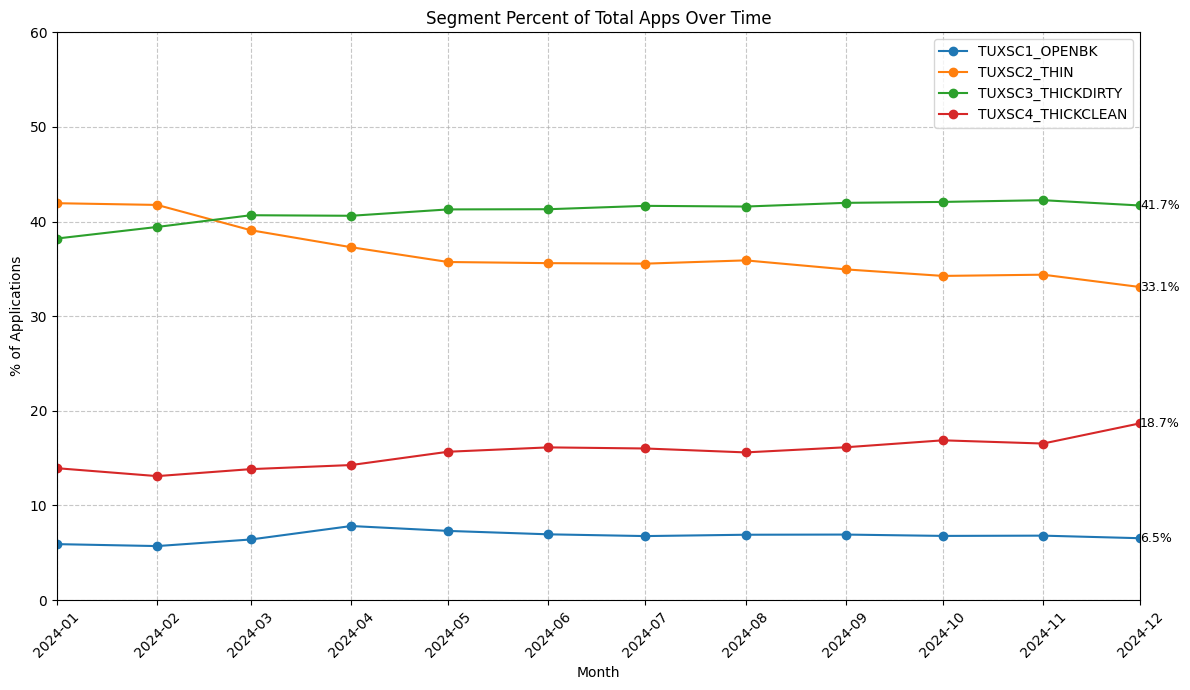

In [32]:
# Calc % 
monthly_percent2 = monthly_counts2.div(monthly_counts2.sum(axis=1), axis=0) * 100

# Plot

plt.figure(figsize=(12, 7))

for col in sc_cols2:
    plt.plot(monthly_percent2.index, monthly_percent2[col], label=col, marker='o')
    last_value = monthly_percent2[col].iloc[-1]
    plt.text(monthly_percent2.index[-1], last_value, f'{last_value:.1f}%', 
             ha='left', va='center', fontsize=9)

plt.title('Segment Percent of Total Apps Over Time')
plt.xlabel('Month')
plt.ylabel('% of Applications')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(0,60)
plt.xlim(pd.Timestamp('2024-01-01'), monthly_percent2.index.max())
plt.tight_layout()
plt.show()

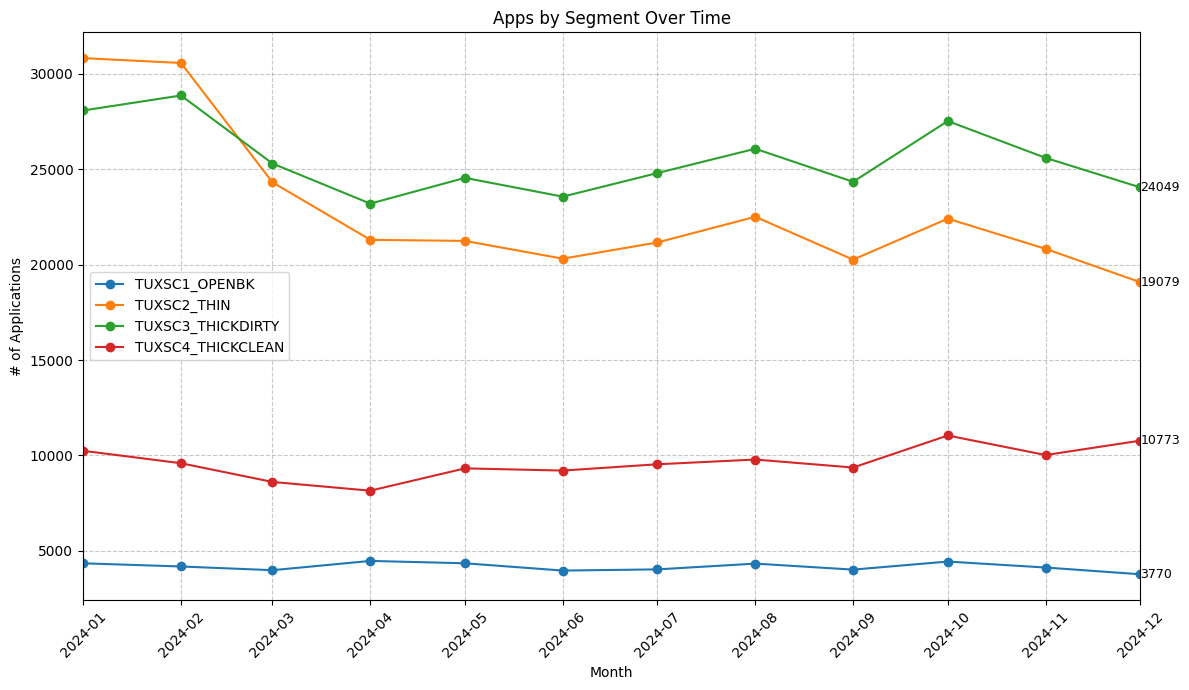

In [33]:
# Plot
plt.figure(figsize=(12, 7))

for col in sc_cols2:
    plt.plot(monthly_counts2.index, monthly_counts2[col], label=col, marker='o')
    # Label the last value
    plt.text(monthly_counts2.index[-1], monthly_counts2[col].iloc[-1], 
             str(int(monthly_counts2[col].iloc[-1])), 
             ha='left', va='center', fontsize=9)

plt.title('Apps by Segment Over Time')
plt.xlabel('Month')
plt.ylabel('# of Applications')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.xlim(pd.Timestamp('2024-01-01'), monthly_counts2.index.max())


plt.tight_layout()
plt.show()
